# Lending Club Case Study - Exploratory Data Analysis

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Data

We have been provided with the **Private Data** of Lending Club.
<br>The complete **loan data** for all loans issued through the time period **2007 to 2011**.
<br>
We also have a data dictionary which describes the meaning of these variables.

### Assumption: 
<br>The loan request if graded by LC and then listed for loan. Now it is up to the investor who decides which loan listing to invest in looking at the loan detail and borrowers information.
<br>Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

## Exploratory Data Analysis

Let's start with importing all the required libraries for the analysis.

In [1]:
# Importing require libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading loan dataset
loan = pd.read_csv("loan.csv")


E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Checking info of the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
# Looking first few values of Dataset.
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
#Counting null values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#Counting % of null values in each columns
missing =round(loan.isnull().sum()/len(loan.index), 2)*100
missing

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [7]:
# Removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [8]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

57

There were **57 columns** with more than 50% values as missing. Removing such columns as these columns clearly add noise and wont help in analysis.


In [9]:
loan = loan.drop(missing_columns, axis=1)

# Checking Dataframe.
print(loan.shape)

(39717, 55)


In [10]:
#Counting null values percentage again.
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [11]:
# There are now 2 columns having approx 32 and 64% missing values - 
# Looking at few enteries in columns
loan[['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [12]:
# Dropping the two columns as it is irrelavent for our analysis.
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [13]:
# Again counting the % of null values.
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [14]:
# Checking missing values in each rows.
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [15]:
# Checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [16]:
# Checking Datatypes.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
# The column int_rate is character type, converting it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: x.split("%")[0])           
loan['int_rate'] = loan['int_rate'].astype(float)

In [18]:
# Checking the data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [19]:
# Extracting the numeric part from the variable employment length

# Droping the missing values from the column 
loan = loan[~loan['emp_length'].isnull()]

# writing a function numeric that will return digits from given string.

def numeric(n):
    string = ""
    for word in n:
        if word.isdigit():
            string = string + word
    return string

# Using numeric function to extract numeric values from the string
loan['emp_length'] = loan['emp_length'].apply(lambda x: numeric(x))

# converting to integer datatype
loan['emp_length'] = loan['emp_length'].astype('int64')

In [20]:
# looking at type of the columns again
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [21]:
# Droping unnecessary columns 

columns =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
df = loan.drop(columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [22]:
# Since the variables zip code, address, state etc are not required in our analysis
# The variable 'title' is derived from the variable 'purpose'
# Thus dropping all of these variables as well

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [23]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()


Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [24]:
# Filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']

# converting values to binary fully paid (0) and charged off (1)
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'].astype('int64')

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [25]:
# Checking default rate
round(np.mean((df['loan_status'])*100), 2)

14.38

Approximately 14% of loans in the dataset are defaulted.

---
#### Other categorical variables distribution
Let's see how some other categorical variables of interest are distributed within the dataset 

In [26]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        

    plt.tight_layout()

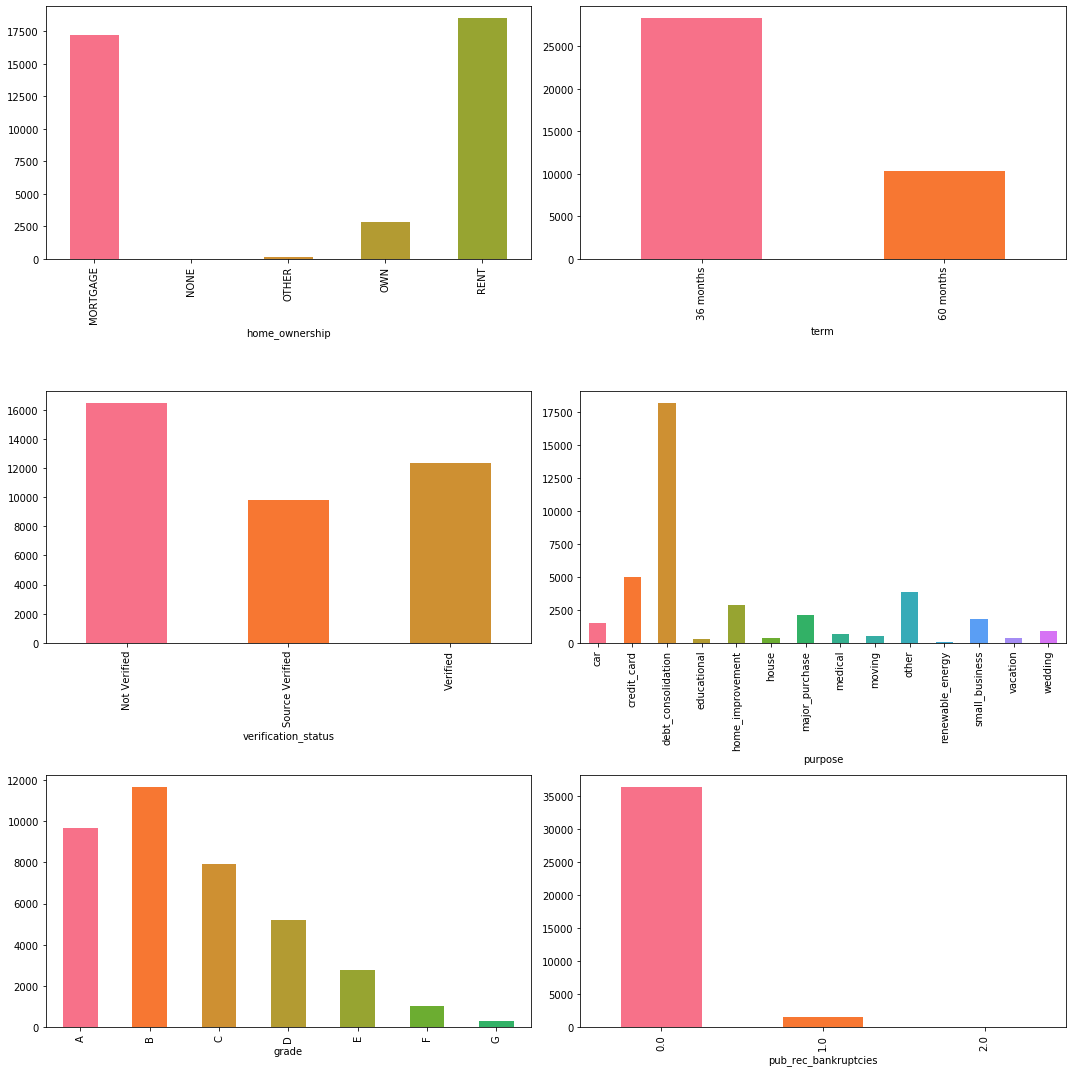

In [27]:
plt.figure(figsize=(15,15))

categoricalBarPlots(loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Obervation**
* Most loans are for 36 month term 
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan 
* Most approved loans are high grade
* <mark> We should investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy </mark>

From above it can be seen that the Small Business, Debt Consolidation, Renewable Energy and Educational loan has higher default tendency

In [28]:
# Defining a function to plot default rate across categorical variables for futher use.
def plot_category(var):
    sns.barplot(x=var, y='loan_status', data=df)
    plt.title("Default Rates Across " + var.title())
    plt.show()

In [29]:
# Observing the distribution of loans across years
# Converting the year column into datetime and then extracting year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [30]:
# Changing date to correct datetime format.
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

In [31]:
# Extracting month and year from issue_date
df['month'] = df['issue_d'].dt.month
df['year'] = df['issue_d'].dt.year


In [32]:
# Observing the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [33]:
# Number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

In [34]:
df.year.head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: year, dtype: int64

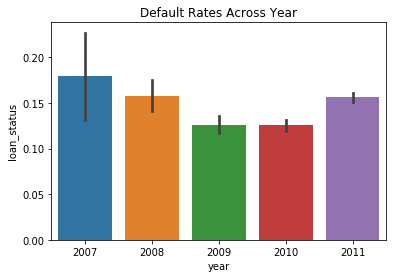

In [35]:
# ploting default rate across years
plot_category('year')

From above it can be seen that the default rates goes down in 2008 spike back up in 2011 and 

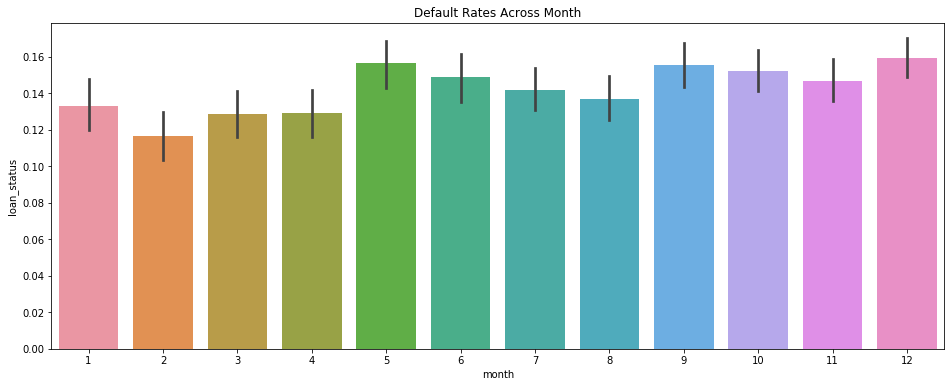

In [36]:
# ploting default rates across months
plt.figure(figsize=(16, 6))
plot_category('month')

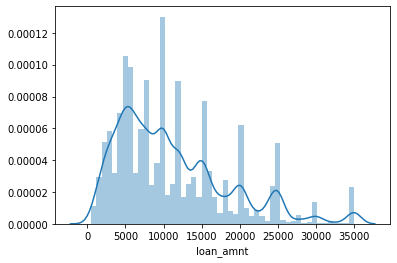

In [37]:
# Ploting a distribution plot of loan amount
sns.distplot(df['loan_amnt'])
plt.show()

In [38]:
# Categorizing loan amount into low ,medium, high, very high.  
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))


In [39]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

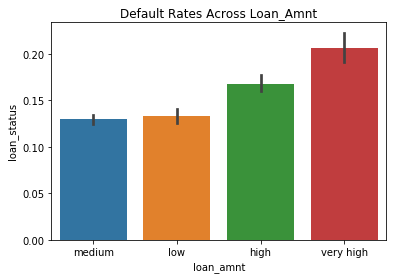

In [40]:
# ploting the default rates across loan amount type
plot_category('loan_amnt')

From above it can be seen that the default rates increases as the loan amount increases.

In [41]:
# catagorizing funded amount invested to low, medium, high, very high.
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

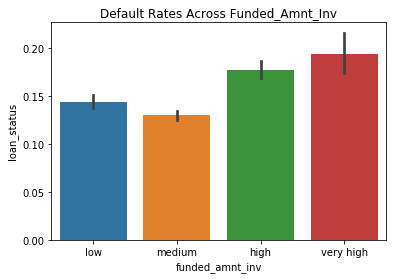

In [42]:
# ploting default rates across funded amount invested
plot_category('funded_amnt_inv')

From above it can be seen that as the amount funded investment increases default rates increases.

In [43]:
# categorizing interest rate to low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

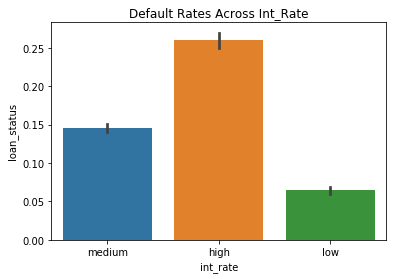

In [44]:
# ploting default rates across rates of interest
plot_category('int_rate')

From above it can be seen that loans with high interest rate has high default rates

In [45]:
# categorizing debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

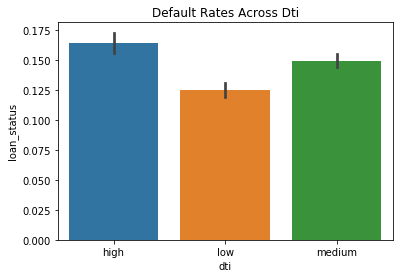

In [46]:
# ploting default rates across debt to income ratio
plot_category('dti')

From above it can be seen that higher the debt to income ration higher the default rates

In [47]:
# categorizing funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

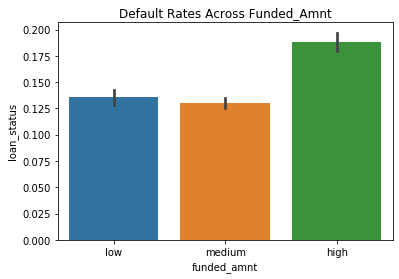

In [48]:
#ploting default rates across funded amount
plot_category('funded_amnt')


From above it can be seen that high funded amount has higher default rates.

In [49]:
# Categorizing installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

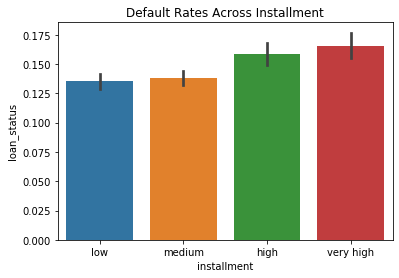

In [50]:
# ploting default rates across installment
plot_category('installment')

From above it can be seen that as the Installment increases the default rate increases as well.

In [51]:
# cateorizing annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

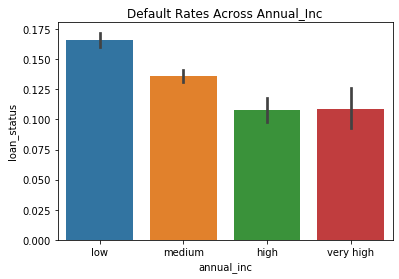

In [52]:
# ploting annual income and default rate
plot_category('annual_inc')

From above it can be seen that lower anual income has higher default rates

In [53]:
# categorizing employment length to fresher, junior, senior, expert

df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

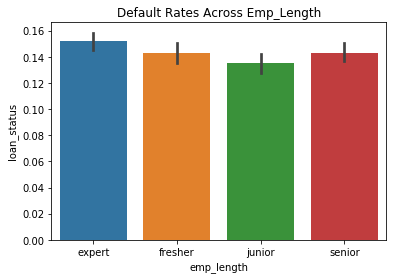

In [54]:
# ploting emp_length and default rate
plot_category('emp_length')

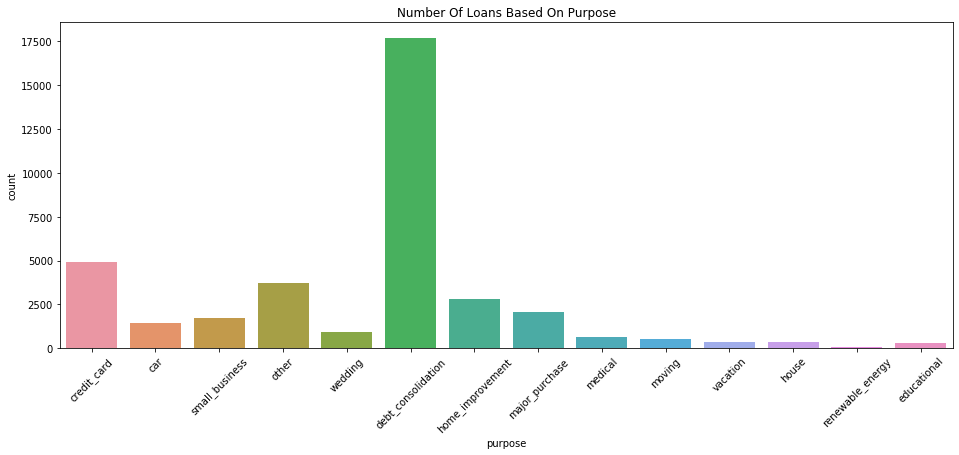

In [55]:
# ploting a countplot of purpose
plt.figure(figsize=(16, 6))
plt.xticks(rotation = 45)
plt.title("Number Of Loans Based On Purpose")
sns.countplot(x='purpose', data=df)
plt.show()

From above It can be seen that consolidation, credit card, home improvement and major purchase are more common purpose of loan.

In [56]:
# filtering the dataframe for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

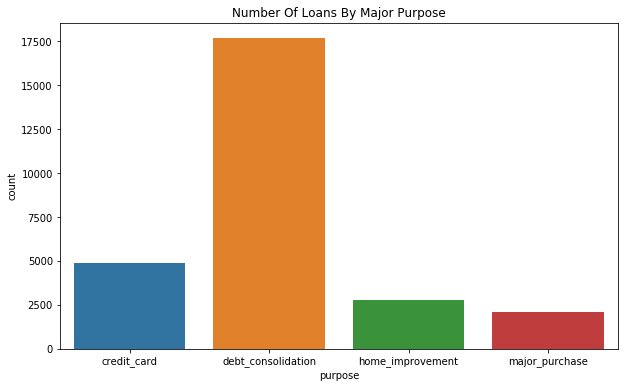

In [57]:
# plotting number of loans by major purpose
plt.figure(figsize=(10,6))
plt.title("number of loans by major purpose".title())
sns.countplot(x=df['purpose'])
plt.show()

From above it can be seen that debt consolidation is most common purpose of loan.

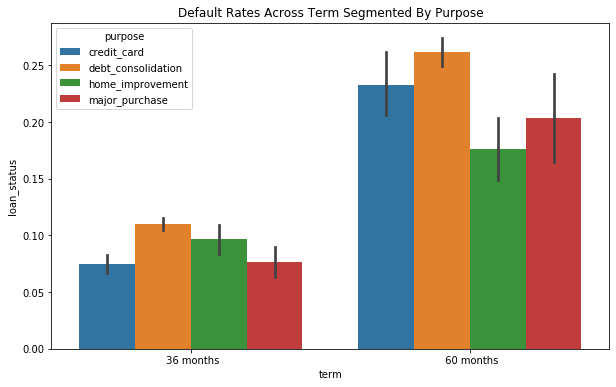

In [58]:
# comparing the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=(10, 6))
plt.title("Default Rates Across Term Segmented By Purpose")
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()


From above it can be seen that the debt consolidation has higher default rates overall

In [59]:
# defining a function which takes a categorical variable and plots the default rate segmented by purpose for further use.

def plot_segmented(var):
    plt.figure(figsize=(12,6))
    sns.barplot(x=var, y='loan_status', hue='purpose', data=df)
    plt.title("Default Rates Across "+var.title() +" Semented By Purpose")
    plt.show()

    

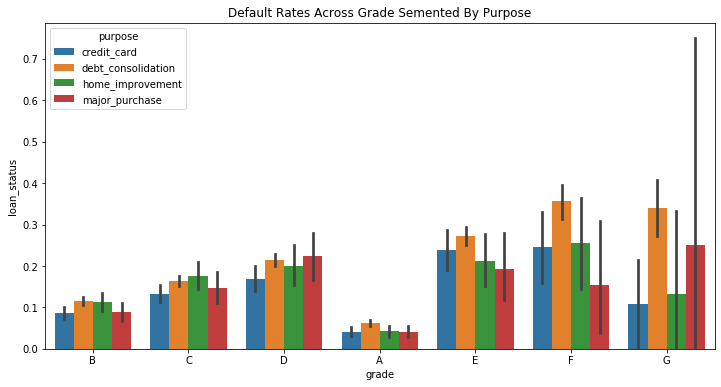

In [60]:
#ploting default rate accross grade of loan segmented by purpose
plot_segmented('grade')

From above it can be seen that the in grade of loan debt consolidation has higher default rates

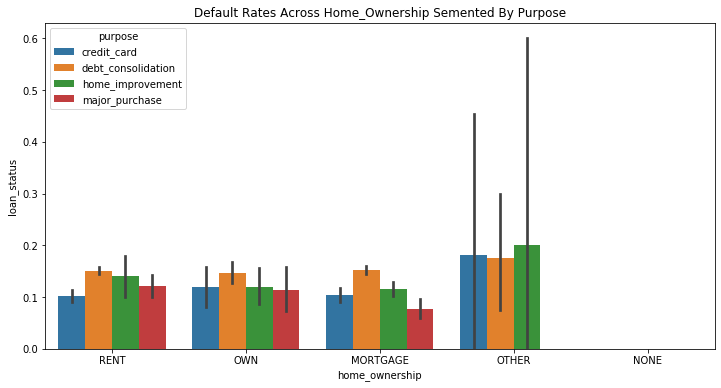

In [61]:
# ploting default rates across home ownership segmented by purpose.
plot_segmented('home_ownership')

From above it can be seen that in general, debt consolidation loans have the highest default rates.

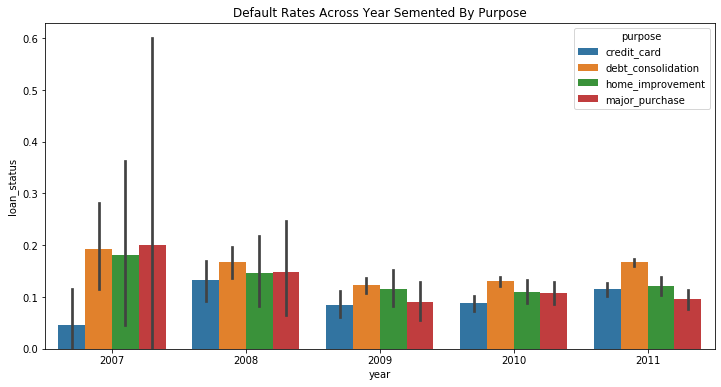

In [62]:
# ploting default rates across year segmented by purpose.
plot_segmented('year')

From above it can be seen that the debt consolidation and major purchase have higher default rates in year 2007.

Debt consolidation have higher default rates overall.

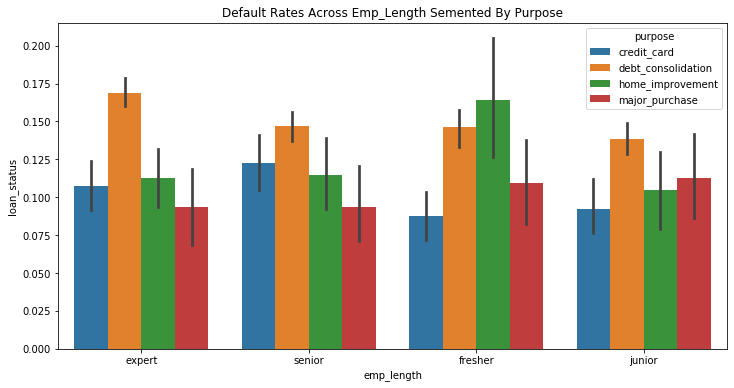

In [63]:
# ploting default rates across employee length segmented by purpose.
plot_segmented('emp_length')

From above it can be seen that in freshers home imporovement loan has higher default rates 

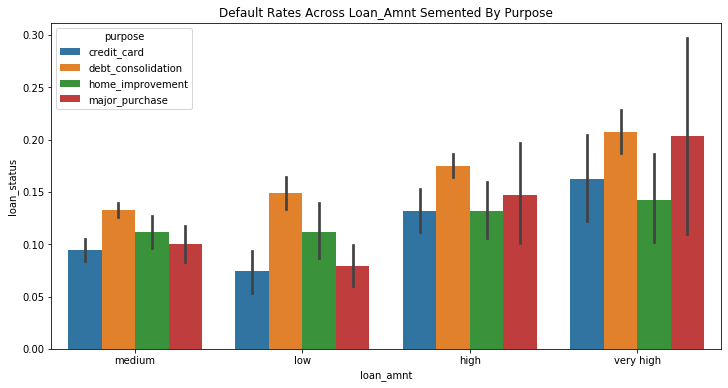

In [64]:
# ploting default rates across loan amount segmented by purpose.
plot_segmented('loan_amnt')

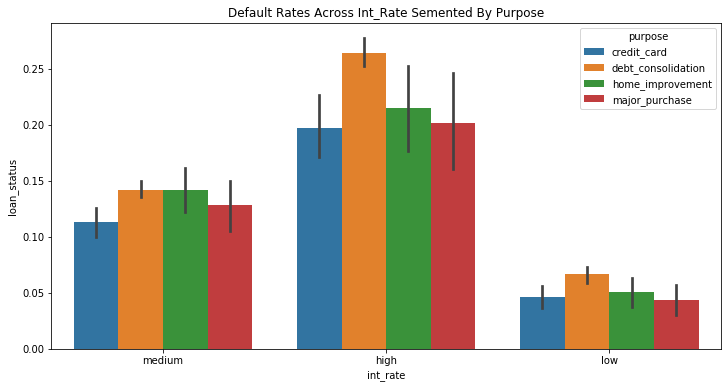

In [65]:
# ploting default rates across interest rate segmented by purpose.
plot_segmented('int_rate')

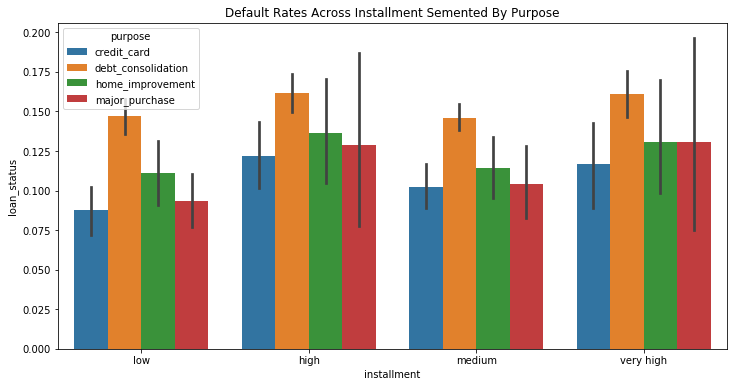

In [66]:
# ploting default rate across installment segmented by purpose.
plot_segmented('installment')

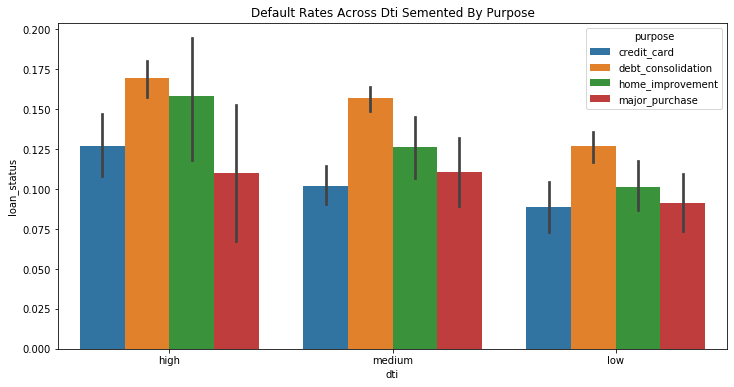

In [67]:
# ploting default reates across debt to income ratio segmented by purpose.
plot_segmented('dti')

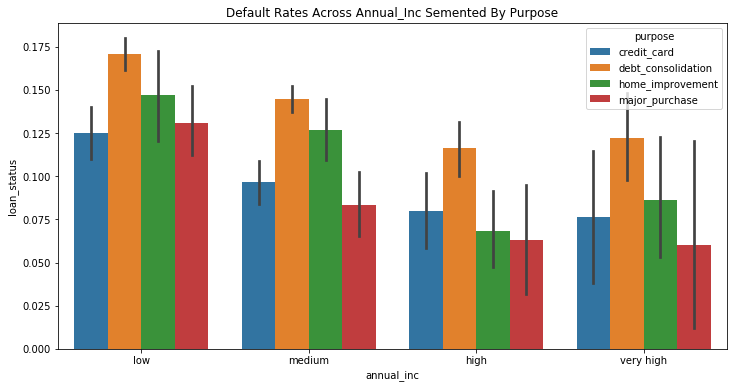

In [68]:
# ploting default rates across annual income segmented by purpose.
plot_segmented('annual_inc')

From above visualization a general trend can be observed that debt conslidation loans have higher default rates across various categories. 

---
#### Variable: int_rate
Data_Dictionary: Interest Rate on the loan.

In [69]:
loan.int_rate.describe()

count    38642.000000
mean        12.052427
std          3.716705
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

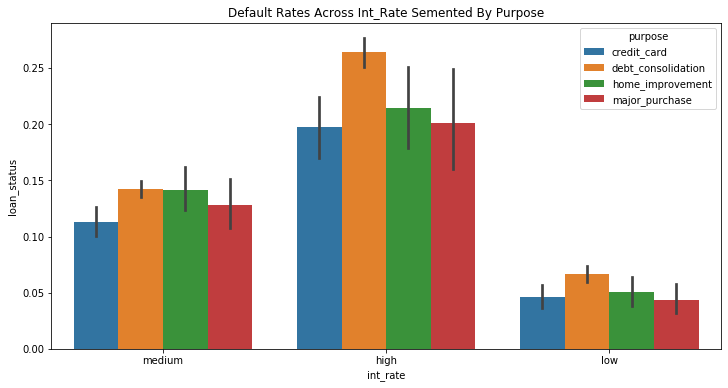

In [70]:
plt.figure(figsize=(15,5))
plot_segmented('int_rate')

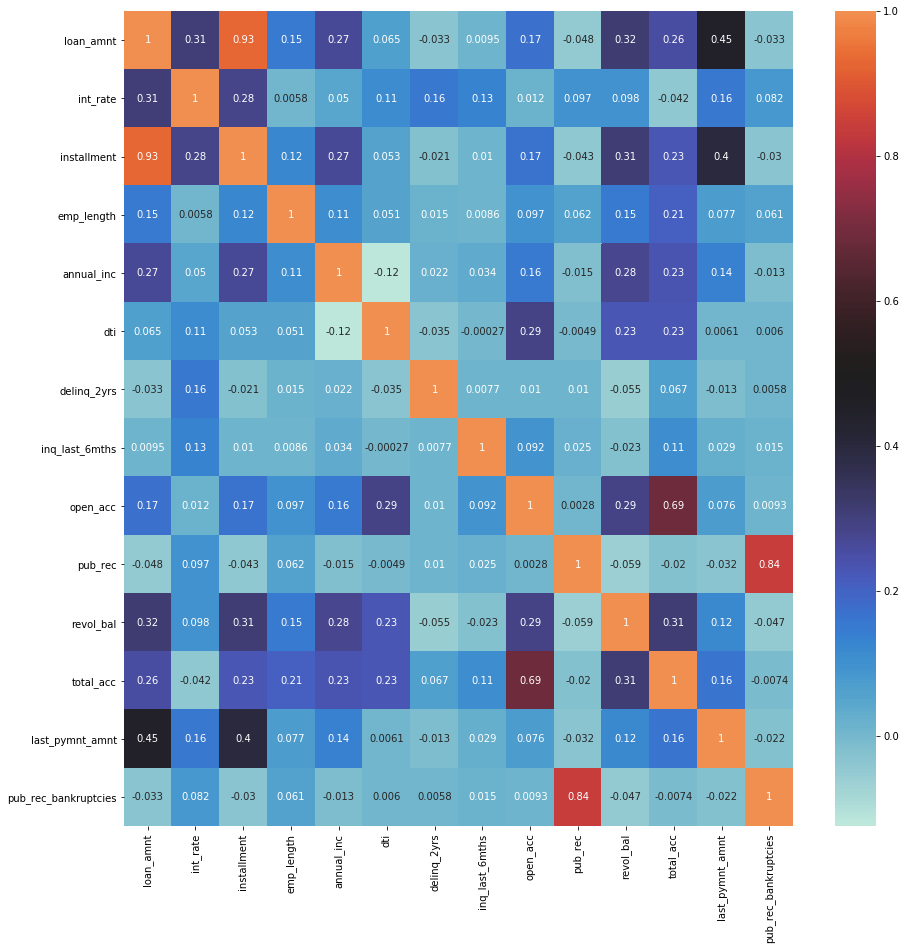

In [71]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation:**
- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- <mark>loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.</mark>
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value. 

In [72]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5399.0,13.881943,3.639045,5.42,11.46,13.61,16.45,24.40
Current,1098.0,15.099326,3.577011,6.00,11.99,14.65,17.99,24.59
Fully Paid,32145.0,11.641071,3.591229,5.42,8.59,11.49,13.99,24.11


**Observation:**
-  The interest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
-  The interest rate for Charged Off loans appear to be higher than for Fully paid.

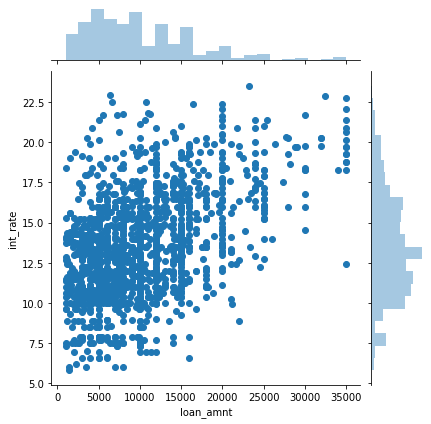

In [73]:
sns.jointplot('loan_amnt', 'int_rate', loan.loc[loan.pub_rec_bankruptcies > 0])


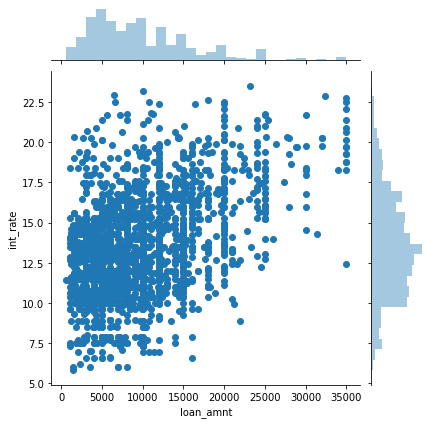

In [74]:
sns.jointplot('loan_amnt', 'int_rate',loan.loc[loan.pub_rec > 0])

In [75]:
loan[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.842884
pub_rec_bankruptcies,0.842884,1.000000


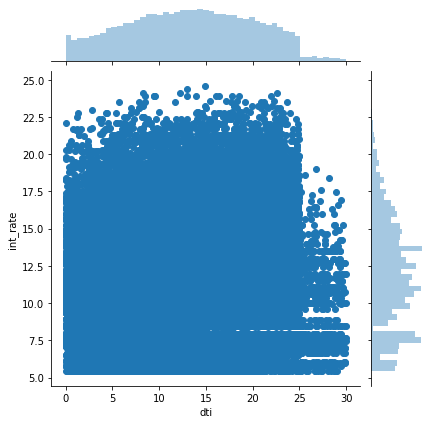

In [76]:
sns.jointplot('dti', 'int_rate',loan)

## The End